In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

import statsmodels.api as sm 
from scipy import stats

In [29]:
df = pd.read_csv("ProjectData-VolunteerResponses.csv")
df.rename(columns = {"Unnamed: 0" : "response_id", "Response" : "response", "Response_Delay" : "response_delay"}, inplace=True)
df

,response_id,response,response_delay
0,0,1.0,62.878650
1,1,1.0,29.642503
2,2,2.0,122.849850
3,3,1.0,21.989094
4,4,1.0,48.482338
...,...,...,...
11297,11297,1.0,25.560722
11298,11298,1.0,49.650975
11299,11299,1.0,54.206393
11300,11300,1.0,61.413633


# Problem 1

In [30]:
response_0 = np.where(df['response'] == 0, 1, 0)
response_1 = np.where(df['response'] == 1, 1, 0)
response_2 = np.where(df['response'] == 2, 1, 0)

response_0_mean, response_0_std = np.mean(response_0), np.std(response_0, ddof=1)
response_1_mean, response_1_std = np.mean(response_1), np.std(response_1, ddof=1)
response_2_mean, response_2_std = np.mean(response_2), np.std(response_2, ddof=1)

print(f'Probability that volunteer does not respond: {response_0_mean} +/- {response_0_std * 1.96 / np.sqrt(len(response_0))}')
print(f'Probability volunteer accepts alert: {response_1_mean} +/- {response_1_std * 1.96 / np.sqrt(len(response_0))}')
print(f'Probability volunteer declines alert: {response_2_mean} +/- {response_2_std * 1.96 / np.sqrt(len(response_0))}')

Probability that volunteer does not respond: 0.19916828879844276 +/- 0.007363399452370639
Probability volunteer accepts alert: 0.36170589276234294 +/- 0.008859023291212598
Probability volunteer declines alert: 0.4391258184392143 +/- 0.00915007901519428


# Problem 2

In [31]:
#Only want the data for when there actually was a response
data = df[df['response'] != 0]['response_delay']

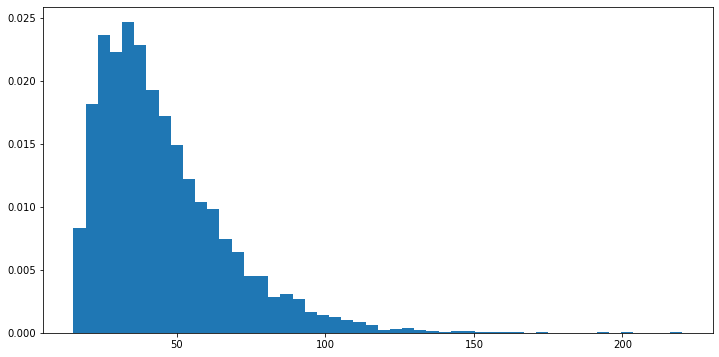

In [32]:
plt.figure(figsize=(12,6))
plt.hist(data,bins = 50,density = True)
plt.show()

# Problem 3

In [33]:
def fit_distribution(data, dist):
    """
    [fit_distribution] is the parameters for distribution [dist] that best fit to the data [data] 
    """
    #Get distribution class
    d = getattr(stats, dist)
    
    #Fit to distribution (MLE)
    params = d.fit(data)
    return params

In [34]:
def qqplot(data, dist, params):
    """
    [qqplot] plots the qqplot for the [data] compared to the the distribution [dist] with 
    parameters [params]
    """
    n = len(data)
    u = (np.arange(1,n+1) - 0.5*np.ones(n))/n
    
    d = getattr(stats, dist)
    ppf = d.ppf(u, *params)

    plt.scatter(np.sort(data), ppf, s=15);
    plt.plot([0, np.max(data)], [0, np.max(data)], ':r'); #plot y=x line
    plt.title(f"Q-Q Plot for {dist} distribution");
    plt.figure(figsize=(20,10))
    plt.show()

/Users/vaughncampos/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vaughncampos/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


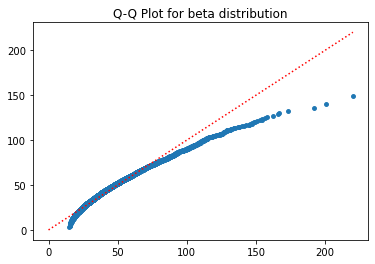

<Figure size 1440x720 with 0 Axes>

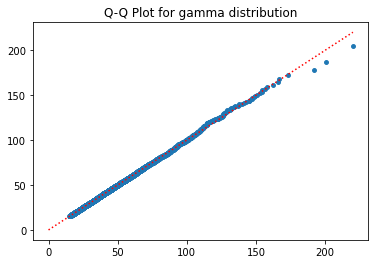

<Figure size 1440x720 with 0 Axes>

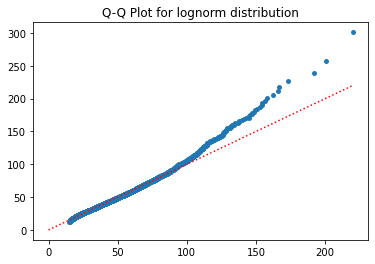

<Figure size 1440x720 with 0 Axes>

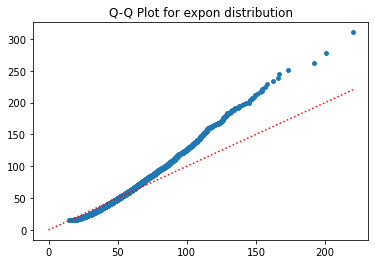

<Figure size 1440x720 with 0 Axes>

/Users/vaughncampos/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


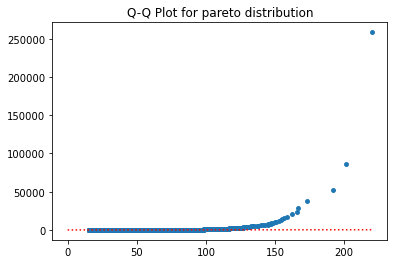

<Figure size 1440x720 with 0 Axes>

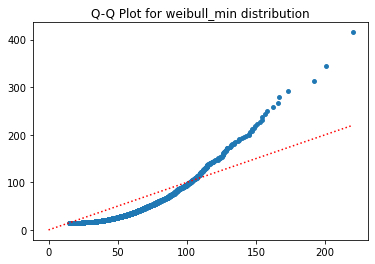

<Figure size 1440x720 with 0 Axes>

In [35]:
distributions = ["beta", 'gamma', 'lognorm', 'expon','pareto',"weibull_min"]
parameters = {}

#Plot qq plots
for d in distributions:
    #Fit distribution and save parameters
    params = fit_distribution(data, d)
    parameters[d] = params
    
    #Plot qq plot for distribution
    qqplot(data, d, params)

In [36]:
parameters

{'beta': (4.521870922678066,
  32.32276108934241,
  0.3046564893455196,
  367.4313762192901),
 'gamma': (1.9593654619843286, 15.000551724006254, 15.432081359868059),
 'lognorm': (0.5806004904774125, 8.747377591460065, 30.977363483291512),
 'expon': (15.114230382949604, 30.12338776996958),
 'pareto': (1.006075815730346, -0.0373775838660759, 15.151607912668089),
 'weibull_min': (0.6055553067817324, 15.114230382949602, 9.233329465794972)}

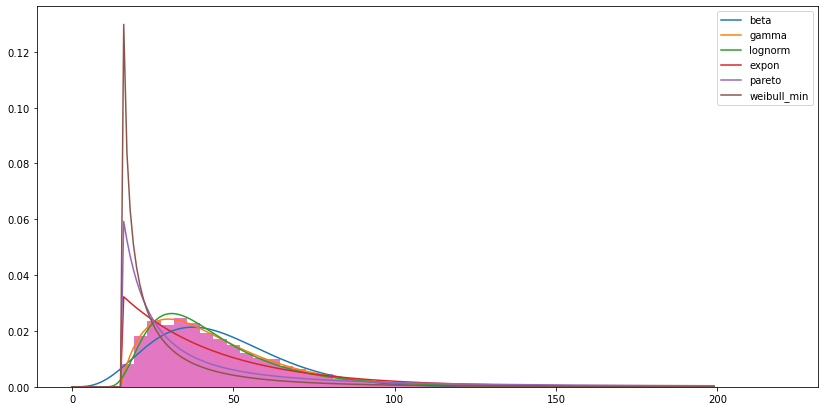

In [37]:
rng = np.arange(0,200)
plt.figure(figsize=(14,7))

for d in distributions:
    #beta
    dist = getattr(stats, d)
    pdf = dist.pdf(rng, *parameters[d])
    
    plt.plot(pdf, label=d)

plt.hist(data,bins=50,density=True)
plt.legend()
plt.show()  

After looking at both the Q-Q plots and these fit distributions laid over the data, we found that the gamma distribution fits the data the best. Looking at the Q-Q plot, the data follows $y=x$ very well expect for some points in higher quantiles, suggesting that the data is very close to the gamma distribution.

Then looking at the histogram with the gamma distribution overlaid, the histogram further confirms that the gamma distributions fits the data very well.

# Problem 4

In [38]:
df2 = pd.read_csv("ProjectData-OHCAs.csv")
df2.rename(columns = {"Unnamed: 0" : "id"}, inplace=True)
df2.head()

,id,Dispatch_Time,Lat,Lon,Amb_Arrival_Time
0,0,8.700385,0.005076,60.046474,8.810252
1,1,20.027518,0.001728,60.032094,20.087112
2,2,20.904470,0.146629,60.123820,21.087282
3,3,32.753878,0.020036,60.133010,32.900611
4,4,38.053615,0.098801,60.087684,38.158638


In [39]:
diff = (df2['Amb_Arrival_Time'] - df2['Dispatch_Time']) #Find Time to Arrival
diff = diff[diff < 1] #remove all arrival delay times greater than 12 hours

In [40]:
data = diff

/Users/vaughncampos/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vaughncampos/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


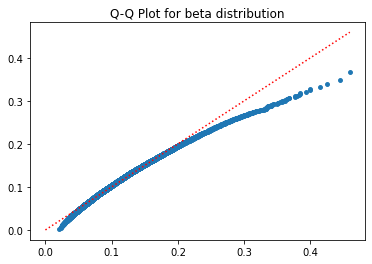

<Figure size 1440x720 with 0 Axes>

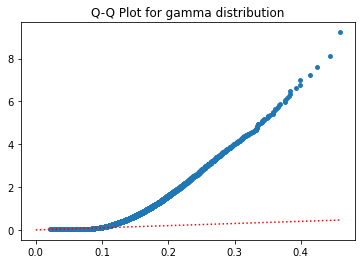

<Figure size 1440x720 with 0 Axes>

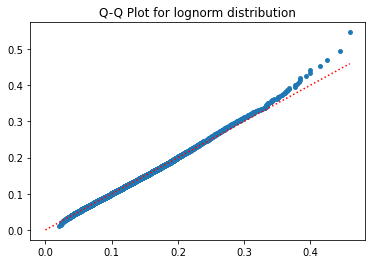

<Figure size 1440x720 with 0 Axes>

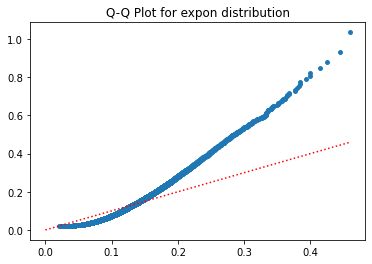

<Figure size 1440x720 with 0 Axes>

/Users/vaughncampos/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


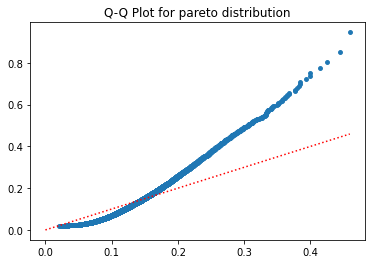

<Figure size 1440x720 with 0 Axes>

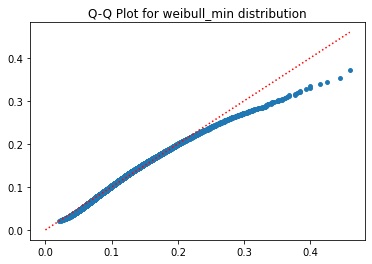

<Figure size 1440x720 with 0 Axes>

In [41]:
distributions = ["beta", 'gamma', 'lognorm', 'expon','pareto',"weibull_min"]
parameters = {}

#Plot qq plots
for d in distributions:
    #Fit distribution and save parameters
    params = fit_distribution(data, d)
    parameters[d] = params
    
    #Plot qq plot for distribution
    qqplot(data, d, params)

In [42]:
parameters

{'beta': (5.812607805247563,
  29.948511090353804,
  -0.011035800777366619,
  0.7889300941173283),
 'gamma': (0.4025849167051162, 0.020700114448118253, 1.0928410801416235),
 'lognorm': (0.37561727084426594, -0.014753138903784482, 0.12276276673960146),
 'expon': (0.020700114448118256, 0.09623171906696228),
 'pareto': (15604732.586734546, -1369220.850205775, 1369220.8709058894),
 'weibull_min': (2.011361425340554, 0.020666994737902386, 0.10889548503190731)}

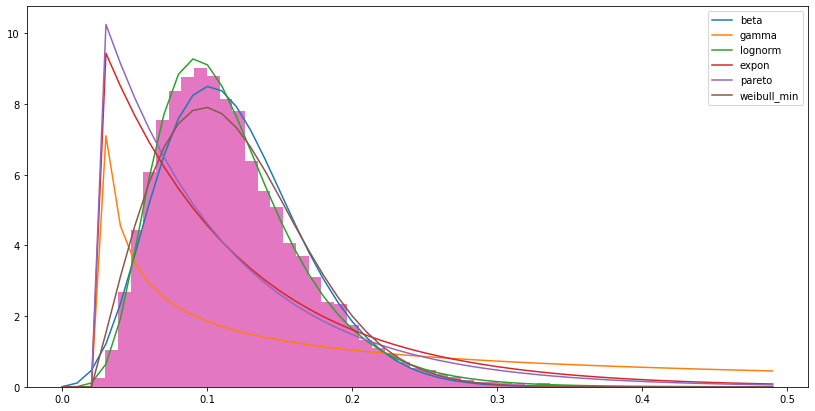

In [43]:
rng = np.arange(0,0.5,0.01)
plt.figure(figsize=(14,7))

for d in distributions:
    #beta
    dist = getattr(stats, d)
    pdf = dist.pdf(rng, *parameters[d])
    
    plt.plot(rng,pdf, label=d)

plt.hist(data,bins=50,density=True)
plt.legend()
plt.show() 

Before looking at the data we noticed a single data point with a delay of 24 hours, so we removed this datapoint before hand.

Similar to the volunteer response delay data, after looking at both the Q-Q plots and these fit distributions overlaid the ambulence delay data we found the gamma distribution again fits the data the best.  The fitted gamma distribution follows the $y=x$ line the closest out of all the distributions we fit and its pdf best follows the histogram of the data.

# Problem 5

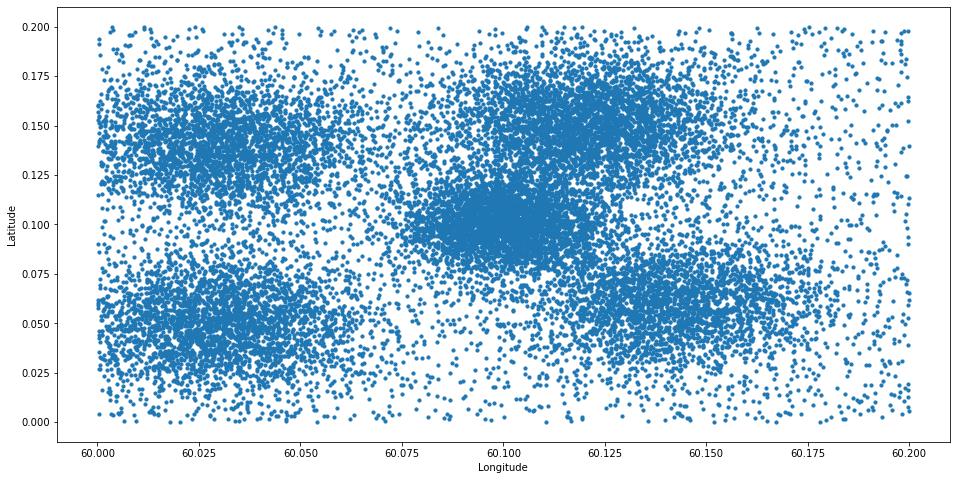

In [44]:
plt.figure(figsize= (16.0, 8.0))
plt.scatter(df2['Lon'],df2['Lat'],s=10) 
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

# Problem 6

In [45]:
probs = []
square_size = 0.025/4
total = len(df2['Lat'])
lat = df2['Lat'].to_numpy()
lon = df2['Lon'].to_numpy() - 60.0
vals = np.arange(0,.2,square_size)
for i in vals: 
    for j in vals: 
        in_lat = np.where((i <= lat) & (lat < i + square_size), 1, 0)
        in_long = np.where((j <= lon) & (lon < j + square_size), 1, 0)
        in_square = np.where(in_lat * in_long == 1, 1, 0)
        in_square = np.sum(in_square)
        prob = in_square/total
        probs.append(prob)
probs = np.array(probs).reshape((len(vals),len(vals)))

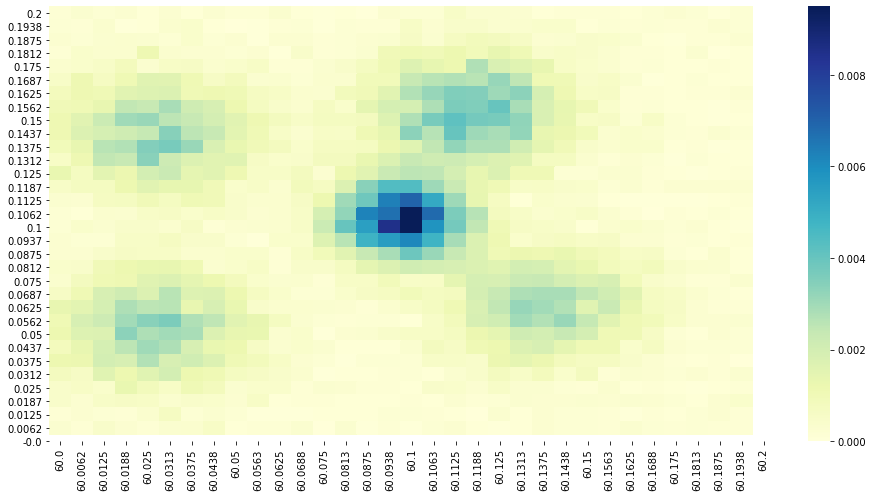

In [46]:
plt.figure(figsize=(16,8))
sns.heatmap(probs[::-1],xticklabels=np.round(np.arange(60,60.2,square_size),4), yticklabels=np.round(np.arange(0.2,-square_size,-square_size),4),cmap="YlGnBu")
plt.show()

In [47]:
probs.shape

(32, 32)

# Problem 7

In [48]:
df2["hour"] = np.floor(df2["Dispatch_Time"]) % 168
grouped_df2 = df2.groupby("hour").count()
grouped_df2

,id,Dispatch_Time,Lat,Lon,Amb_Arrival_Time
hour,,,,,
0.0,29,29,29,29,29
1.0,32,32,32,32,32
2.0,28,28,28,28,28
3.0,18,18,18,18,18
4.0,17,17,17,17,17
...,...,...,...,...,...
163.0,102,102,102,102,102
164.0,84,84,84,84,84
165.0,57,57,57,57,57


In [49]:
eoweek = 168 #hour lambdas

def calc_hour_lams():
    lams = []
    for hour in range(168):
        data = df2[df2["hour"] == hour]
        lam = len(data) / (52 * 15)
        lams.append(lam)
    return lams    

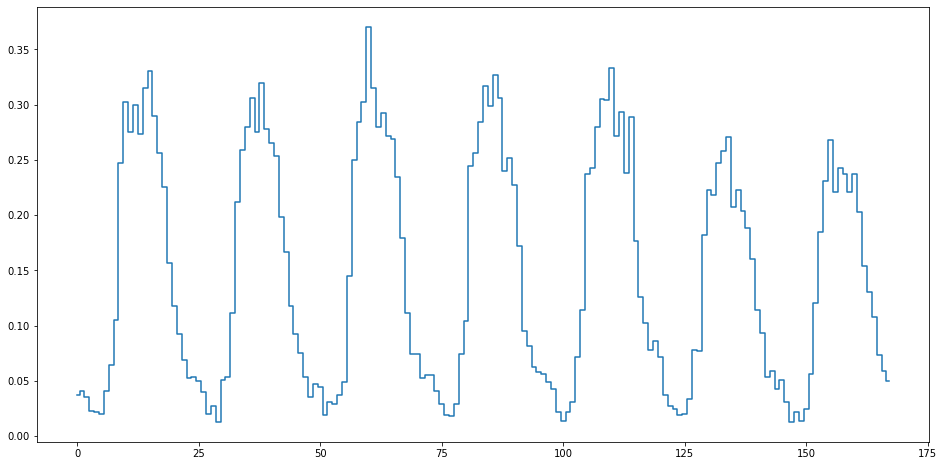

In [50]:
lams = calc_hour_lams()

plt.figure(figsize=(16,8))
plt.step(np.arange(eoweek),lams,where="mid")
plt.show()

In [51]:
tb = pd.DataFrame()
tb["Hour"] = list(range(eoweek))
tb["Rate"] = lams
tb

,Hour,Rate
0,0,0.037179
1,1,0.041026
2,2,0.035897
3,3,0.023077
4,4,0.021795
...,...,...
163,163,0.130769
164,164,0.107692
165,165,0.073077
166,166,0.058974


# Problem 8

In [52]:
import math

def calculate_distance(p1,p2):  # generally used geo measurement function
    lat1,lat2 = p1[0],p2[0]
    lon1,lon2 = p1[1],p2[1]
    
    R = 6378.137 # Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d * 1000 # meters

def condition(points):
    #points[0] : lat (degrees), points[1] : lon (degress), points[2] : time (?)
    five_mins = 5 / 60 #Need in terms of lam units
    
    for i in range(len(points)):
        for j in range(i+1,len(points)):
            time_diff = abs(points[i][2] - points[j][2])
            distance = calculate_distance(points[i],points[j])
            if time_diff <= five_mins and distance <= 500:
                return True
            
    return False
    

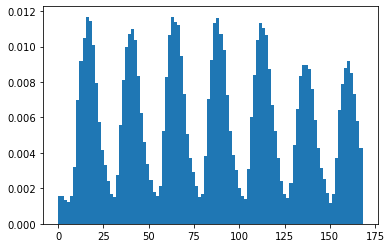

In [53]:
M = np.max(probs) #Used for A/R for random location
lam_star = max(lams) #Used for thinning for random inter-arrival time

num_squares = probs.shape[0]

n = 10000
meets_condition = np.zeros(n)

pts = []
for week in range(n): #For a bunch of weeks
    #Generate a weeks worh of points, check condition
    points = []
    time = 0
    while time < eoweek:
        #Get random location using acceptance/rejection
        p = None
        while p == None:
            x, y = np.random.rand()/5, np.random.rand()/5 #Generate Random location
            #Get prob of accepting in square of random location
            prob = probs[int(np.floor(num_squares * x / 0.2)),int(np.floor(num_squares * y / 0.2))] 
            z = M*np.random.rand()
            if z <= prob:
                p = [x,y]
        
        #Get random inter-arrival time using correct lambda
        lam = lams[int(time%eoweek)]
        e = np.random.exponential(1/lam_star) #Generate random time in lam units
        u = np.random.rand() * lam_star
        
        #Increment time whether reject or accept
        time += e
        
        #Break if time goes over end of the week
        if time > eoweek:
            break
        
        if u <= lam:
            #Accept
            points.append((p[0],p[1],time))
            
    pts += [i[2] for i in points]        
    meets_condition[week] = int(condition(points))

plt.hist(pts,density=True, bins = 100)
plt.show()

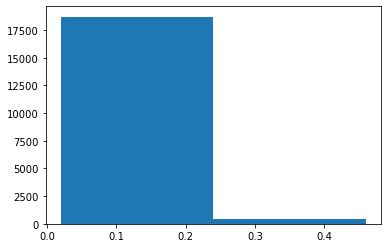

P(two points meet condition) = 0.0019


In [54]:
plt.hist(data,bins=2)
plt.show()

print(f"P(two points meet condition) = {np.mean(meets_condition)}")

In order to find this probability by simulation, we used a combination of acceptance/rejection and thinning. We simulated over 10000 weeks and for each week we would randomly accept a point and then use thinning to generate a time of cardiac arrest for that point. If the thinning time was not accepted, the point would be thrown out, time would advance, and the loop would restart. We then would use the accepted points and times to find the distances between all points and then check if any were within 500 meters and 5 minutes for each week.

# Problem 9

Since we have no data, we use the triangular distribution with minimum 1.5, mean 2.5, and maximum 3.5:

$$
f(x) = 
\begin{equation} 
\left\{
    \begin{array}{lr}
        x - 1.5, & \text{if } 1.5 \leq x \leq 2.5 \\
        3.5 - x, & \text{if } 2.5 < x \leq 3.5
    \end{array}
\right\}
\end{equation}
$$

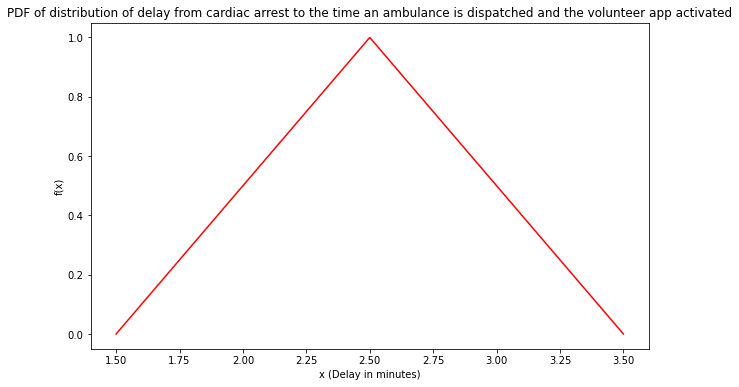

In [55]:
rng = [1.5, 2.5, 3.5]
fx = [0, 1, 0]

plt.figure(figsize=(10,6))
plt.title("PDF of distribution of delay from cardiac arrest to the time an ambulance is dispatched and the volunteer app activated")
plt.ylabel("f(x)")
plt.xlabel("x (Delay in minutes)")
plt.plot(rng, fx, color='r')
plt.show()

# Problem 10

In order to model the location of volunteers that would be contacted, we assume that the locations of the OHCA calls are indicitive of population centers, so the proportion of calls in a given square is the same as the proportion of volunteers in that same square.  In other words there would be $pn$ volunteers in a given square where $p$ is the proportion of OHCA calls in that square, and $n$ is the amount of volunteers in the network.  

Then given a single OHCA call, we create a circle of radius 1 Km around a call as only volunteers within 1 Km are contacted, then figure out how many volunteers are likely to be in that radius.  Having drawn out this 1 Km radius circle, we then define the number of volunteers likely to be in that circle as 
$$\sum_{s\in S} np_s \cdot \frac{AreaInCircle(s)}{Area(s)}$$

Where $S$ is the set of squares that overlap with the circle and $p_s$ is the proportion of OHCA calls in square $s$.

In [56]:
def generate_OHCA(n, probs, grid_dims):
    """
    [generate_OHCA] will generate [n] random locations of OHCA calls
    based on our calculated spatial probabilities [probs]
    
    parameters
    - n: integer, how many OHCA locations to generate
    - probs: m by m matrix of probabilities, representing the proportion
    of of OHCA calls that occur, probs[i,j] in square i,j
    - grid_dims: 4-tuple representing the box to generate in 
    e.g. grid_dims=(x,y,w,h) where x,y is the bottom left corner and w and h
    are the width and height of the box respectively
    
    returns
    - coordinates: 2 by n array of generated coordinates
    
    """
    m = probs.shape[0]
    X, Y, W, H = grid_dims
    
    coordinates = np.zeros((2,n))
    num_generated = 0
    while num_generated < n:
        #Generate a random uniform location 
        x = np.random.uniform(X, X+W)
        y = np.random.uniform(Y, Y+H)
        
        #Generate random probabilty
        p = np.random.uniform()
        
        #Determine the box the coordinate falls in
        j = int((x - X) * m * 1 / W)
        i = int((y - Y) * m * 1 / H)
        
        if p <= probs[i,j]:
            #Accept
            coordinates[:,num_generated] = [x, y]
            num_generated += 1
    
    return coordinates

In [60]:
response_0 = np.where(df['response'] == 0, 1, 0)
response_1 = np.where(df['response'] == 1, 1, 0)
response_2 = np.where(df['response'] == 2, 1, 0)

response_0_mean, response_0_std = np.mean(response_0), np.std(response_0, ddof=1)
response_1_mean, response_1_std = np.mean(response_1), np.std(response_1, ddof=1)
response_2_mean, response_2_std = np.mean(response_2), np.std(response_2, ddof=1)

print(f'Probability that volunteer does not respond: {response_0_mean} +/- {response_0_std * 1.96 / np.sqrt(len(response_0))}')
print(f'Probability volunteer accepts alert: {response_1_mean} +/- {response_1_std * 1.96 / np.sqrt(len(response_0))}')
print(f'Probability volunteer declines alert: {response_2_mean} +/- {response_2_std * 1.96 / np.sqrt(len(response_0))}')

Probability that volunteer does not respond: 0.19916828879844276 +/- 0.007363399452370639
Probability volunteer accepts alert: 0.36170589276234294 +/- 0.008859023291212598
Probability volunteer declines alert: 0.4391258184392143 +/- 0.00915007901519428


In [125]:
def generate_volunteers(number_vols, ohca_coord, probs):
    """
    [generate_volunteers] is a list of volunteer distances within 1km 
    of the ohca call location, [ohca_coord]
    """
    
    if number_vols == 0:
        return [float('inf')], 0
    
    volunteer_locations = []
    nearby_vol_dists = []
    lambda_star = np.max(probs)*number_vols
    mean = np.random.poisson(lambda_star*32**2)

    for _ in range(mean):
        
        x = np.random.uniform(60,60.2)
        y = np.random.uniform(0,0.2)
        u = np.random.uniform(0,1)
        if u < number_vols*probs[int(np.floor((x-60)/(0.2/32))),int(np.floor(y/(0.2/32)))]/lambda_star:
            volunteer_locations.append([x,y])
    
    for loc in volunteer_locations:
        distance_from_OHCA = calc_volunteer_dist(loc, ohca_coord)
        if distance_from_OHCA < 1000:
            nearby_vol_dists.append(distance_from_OHCA)
            
    nearby_vol_dists = np.sort(nearby_vol_dists)
    
    within_200_m = 0 if len(nearby_vol_dists) == 0 or nearby_vol_dists[0] > 200 else 1
    
    return nearby_vol_dists, within_200_m

def calc_volunteer_dist(volunteer_coords, ohca_coord):
    """
    [calc_volunteer_dist] is the distance in METERS from the volunteers
    location, [volunteer_coord], to the ohca call location [ohca_coord]
    
    Note: both [volunteer_coord] and [ohca_coord] are both in latitude
    and longitude
    """
    
    lat1,lat2 = volunteer_coords[0],ohca_coord[0]
    lon1,lon2 = volunteer_coords[1],ohca_coord[1]

    R = 6378.137 # Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d * 1000 # meters 
    
def generate_dispatch():
    """
    [generate_dispatch] is an interarrival time between a person experiencing
    an OHCA occurence according to the triangle function Triangle(1.5,2.5,3.5)
    """
    
    #THIS IS IN MINUTES
    return np.random.triangular(1.5,2.5,3.5)
    
def generate_ambulance():
    """
    [generate_ambulance] is an interarrival time according to the lognormal distribution
    we calculated: Lognormal(0.37561727084426594, -0.014753138903784482, 0.12276276673960146)
    """
    #TODO: Figure out the correct parameters
    
    #THIS IS IN MINUTES
    return stats.lognorm.rvs(0.37561727084426594, -0.014753138903784482, 0.12276276673960146)*60

def survival_rate(t1, t2):
    """
    [survival_rate] is the survival rate when cpr is initiated at [t1] minutes
    after cardiac arrest and defibrillation is initiated at [t2] minutes after
    cardiac arrest
    """
    return 1/(1 + np.exp(0.04+0.3*t1+0.14*(t2-t1)))


In [262]:
def volunteer_action_time(volunteer_dists, time):
    """
    returns
    - responses: list of tuples (volunteer's response, volunteers response time)"""
    responses = []
    acceptances = []
    
    for dist in volunteer_dists:
        # Generate action or inaction (A/R)
        
        # TODO: Different prob distribution?
        prob = np.random.uniform()
        
        #GAMMA IS IN SECONDS
        if prob <= 0.19916828879844276: #Does not respond
            responses.append((0,float('inf')))
            acceptances.append(float('inf'))
            
        elif prob <= 0.19916828879844276 + 0.36170589276234294 and prob > 0.19916828879844276: #Accepts
            delay = stats.gamma.rvs(1.9593654619843286, 15.000551724006254, 15.432081359868059)
            responses.append((1,time + delay))
            acceptances.append(time + delay)
            
        else: #Declines
            delay = stats.gamma.rvs(1.9593654619843286, 15.000551724006254, 15.432081359868059)
            responses.append((0,time + delay))
            acceptances.append(float('inf'))
        
    return responses, acceptances

In [263]:
def set_up(ohca_coord, n_volunteers, probs):
    """
    [set_up] will set up and return the parameters needed for running 
    a simulation

    parameters
    [ohca_coord]: 2-vector representing the x, y coordinate of the OHCA call
    
    
    returns
    - survival_prob: float between 0 and 1 representing the probability of survival based on
    the survival rate function
    - 
    """   
    #Generate random cardiac arrest to call to dispatch time
    dispatch_time = generate_dispatch() 
    
    #Generate sorted distances of volunteers within 1km
    volunteer_dists, within_200_m = generate_volunteers(n_volunteers, ohca_coord, probs)
    
    #generate random ambulance time
    #THIS IS IN MINUTES
    ambulance_time = (generate_ambulance()) + dispatch_time
    
    return dispatch_time, volunteer_dists, ambulance_time, within_200_m

In [409]:
def run_simulation(ohca_coord, n_volunteers, probs, set_up, max_t=10, max_p=20):
    """
    [run_simulation] will perform one simulation for a single OHCA call
    
    paramters
    - ohca_coord: 2-vector representing the x, y coordinate of the OHCA call
    - n_volunteers: total number of volunteers in the city
    - probs: probability distribution of volunteers
    
    returns
    - survival_prob: float between 0 and 1 representing the probability of survival based on
    the survival rate function
    """    
    
    dispatch_time, volunteer_dists, ambulance_time, within_200_m = set_up
    
    survival_matrix = np.zeros((max_t,max_p))
    within_200_matrix = np.zeros((max_t,max_p))
    volunteer_first_matrix = np.zeros((max_t,max_p))
    total_alerted_matrix = np.zeros((max_t,max_p))
    n_acceptances_matrix = np.zeros((max_t,max_p))
     
    #time_in_between variable
    for t in range(0,max_t):
        
        #number of people to alert every "round"
        for p in range(0,max_p):
            if len(volunteer_dists) == 0:
                t1 = ambulance_time + dispatch_time
                t2 = t1
                volunteer_first_matrix[t,p] = 0
                n_acceptances = 0
                num_alerted = 0
                within_200_m = 0
            else:
                #timebefore = time.time()
                arrival_times, n_acceptances, num_alerted = dispatch_policy(volunteer_dists, t + 1, p + 1)
                arrival_times = arrival_times /60
                #timeafter = time.time()
                #print(timeafter-timebefore)
                volunteer_time, ambulance_time_temp = np.min(arrival_times) + dispatch_time, ambulance_time + dispatch_time
                
                if volunteer_time < ambulance_time_temp:
                    volunteer_first_matrix[t,p] = 1
                    
                else:
                    volunteer_first_matrix[t,p] = 0
    
                #Calculate metrics
                t2 = ambulance_time_temp #Defibrillation time
                t1 = np.minimum(volunteer_time, t2) #CPR time
            
            #Survival rate
            SR = survival_rate(t1, t2)

            #append matrix vals
            survival_matrix[t,p] = SR
            within_200_matrix[t,p] = within_200_m
            total_alerted_matrix[t,p] = num_alerted   
            n_acceptances_matrix[t,p] = n_acceptances
    #print(total_alerted_matrix)
    return survival_matrix, within_200_matrix, volunteer_first_matrix, total_alerted_matrix, n_acceptances_matrix

In [498]:
coords = generate_OHCA(10, probs, (60, 0, 0.2, 0.2))

In [499]:
def dispatch_policy(volunteer_dists, time_in_between, num_notify):
    
    num_notify = min(num_notify, len(volunteer_dists))
    
    total_volunteers = len(volunteer_dists)
    global_responses = np.array([])
    global_arrivals = np.array([])
    global_acceptances = np.array([])
    
    num_accepted = 0
    num_notified = 0
    time = 0
    while num_accepted == 0 and num_notified <= total_volunteers:
        #don't have enough left to notify
        if (num_notified + num_notify >= total_volunteers):
            responses, acceptances = volunteer_action_time(volunteer_dists[num_notified: ], time)
            
        else:
            responses, acceptances = volunteer_action_time(volunteer_dists[num_notified: num_notified + num_notify], time)
            
        #check if anyone has responded by time time_in between
        responses = np.array(responses)
        acceptances = np.array(acceptances)
        
        acceptance_check = np.where(acceptances <= (time + time_in_between), 1, 0)
        acceptance_global_check = np.where(global_acceptances <= (time + time_in_between), 1, 0)
        num_accepted = sum(acceptance_check) + sum(acceptance_global_check)
        
        #append responses 
        global_responses = np.append(global_responses, responses)
        global_acceptances = np.append(global_acceptances,acceptances)
          
        num_notified += num_notify
        
        if num_accepted > 0:
            break
        
        #calculate the time it would take for the next person to get to scene if they accepted right now.
        #next closest person 
        if num_notified < total_volunteers:
            volunteer_closest = volunteer_dists[num_notified]
            
            #what is the fastest this volunteer can get there, assuming they are notifed and accept RIGHT NOW
            volunteer_time = volunteer_closest/6000 
            #generate cdf of ambulance 
            prob_ambulance_arrived = stats.lognorm.cdf((volunteer_time + (45 /3600) +(time/3600)), 0.37561727084426594, -0.014753138903784482, 0.12276276673960146)
            
            #if the probability that the ambulance arrived by the time it takes the closest volunteer to get 
            # there is greater than 0.90, then we stop notifying people
            if prob_ambulance_arrived >= 0.90:
                break
            
        #move forward in time
        time += time_in_between
        
   
    arrival_times = (global_acceptances) + (volunteer_dists[:num_notified])/6000 * 60
        
    num_accepted = np.sum(np.where(global_acceptances < float('inf'), 1, 0 ))

    return arrival_times, num_accepted, min(num_notified, total_volunteers)

In [500]:
n = coords.shape[1]

max_t, max_p = 40, 20

survival_matrix = np.zeros((n, 12, max_t, max_p)) #Probability
within_200_matrix = np.zeros((n, 12, max_t, max_p)) #Binary
volunteer_first_matrix = np.zeros((n, 12, max_t, max_p)) #Binary
total_alerted_matrix = np.zeros((n, 12, max_t, max_p)) #Integer
number_accepted_matrix = np.zeros((n, 12, max_t, max_p)) #Integer

   
for i, n_vols in enumerate(list(range(1000,13000, 1000))):
    for ohca in range(coords.shape[1]): 
        su = set_up(coords[:,ohca], n_vols, probs)
        
        timebefore = time.time()
        survival, within_200, volunteer_first, total_alerted, n_acceptances = run_simulation(coords[:,ohca], n_vols, probs, su, max_t=max_t,max_p=max_p)
        timeafter = time.time()
        #print(timeafter - timebefore)
        survival_matrix[ohca, i] = survival
        within_200_matrix[ohca, i] = within_200
        volunteer_first_matrix[ohca, i] = volunteer_first
        total_alerted_matrix[ohca, i] = total_alerted
        number_accepted_matrix[ohca, i] = n_acceptances
     
performance_metrics = {
    "SR":survival_matrix,
    "NF":within_200_matrix,
    "VF":volunteer_first_matrix,
    "TA":total_alerted_matrix,
    "NA":number_accepted_matrix
}

In [501]:
def optimal_params(matrix, index, max_t, max_p):
    shape = matrix.shape
    
    i = (index // (max_t * max_p))
    j = (index - i*max_t*max_p) // max_p
    k = index - i*max_t*max_p - j*max_p
    print(i,j,k)
    print(matrix[i, j, k])

SR


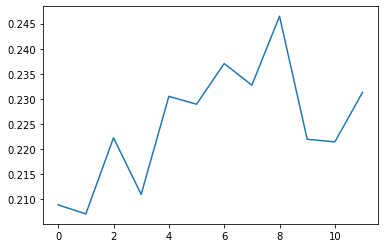

0.24860209162767233
8 21 7
0.24860209162767233
NF


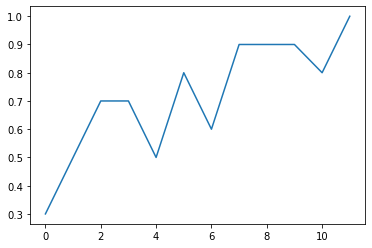

1.0
11 0 0
1.0
VF


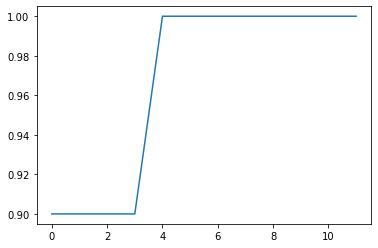

1.0
0 0 3
1.0
TA


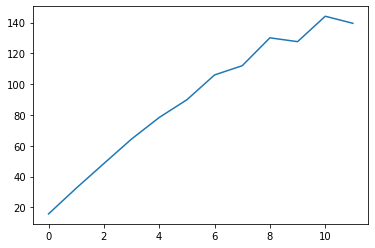

147.4
11 0 18
147.4
NA


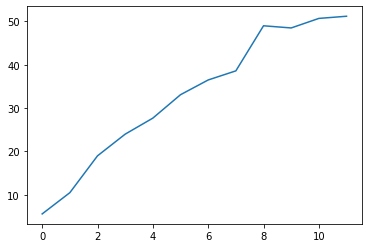

53.1
10 0 18
53.1


In [502]:
for metrics_mat in performance_metrics:
    print(metrics_mat)
    mat = performance_metrics[metrics_mat]
    #print(np.max(mat))
    mean_mat = np.mean(mat, axis=0)
    #print(mean_mat)
    #input()
    
    plt.plot(mean_mat[:,0,19])
    plt.show()

    index = np.argmax(mean_mat)
    print(np.max(mean_mat))
    optimal_params(mean_mat, index, max_t,max_p)

In [478]:
mean_SR = np.mean(survival_matrix,axis=0)
mean_TA = np.mean(total_alerted_matrix,axis=0)
mean_mat.shape

(12, 40, 20)

In [479]:
def opt_jawn(num_vols):
    
    idx = (num_vols//1000 - 1)
    #index into 4d matrix to get the matrix for number of ppl
    matSR = mean_SR[idx,:,:]
    
    matTA = mean_TA[idx,:,:]
    max_SR = np.max(matSR)
    print(matSR[matSR >= max_SR - 0.001])
    
    x,y = matSR.shape
    
    #Find all those within 2%
    mat2 = np.where(matSR >= max_SR - 0.001, matSR,0)
    
    minTA = float('inf')
    
    for i in range(x):
        for j in range(y):
            if mat2[i,j] > 0 and matTA[i,j] < minTA:
                minTA = matTA[i,j]
                indices = (i,j)
    
    #mat2 = matTA[matSR >= max_SR - 0.01]
    return indices, minTA

In [496]:
def opt_jawn(num_vols, survival_matrix, total_alerted_matrix):
    
    mean_SR_matrix = np.mean(survival_matrix,axis=0)
    mean_total_alerted_matrix = np.mean(total_alerted_matrix,axis=0)
    
    idx = (num_vols//1000 - 1)
    #index into 4d matrix to get the matrix for number of ppl
    SR_matrix = mean_SR_matrix[idx,:,:]
    
    total_alerted_matrix = mean_total_alerted_matrix[idx,:,:]
    
    max_SR = np.max(SR_matrix)
    print(SR_matrix[SR_matrix >= max_SR - 0.001])
    
    x,y = total_alerted_matrix.shape
    
    #Find all those within 2%
    within_2_percent_optimal = np.where(SR_matrix >= max_SR - 0.0001, SR_matrix,0)
    
    min_total_alerted = float('inf')
    
    for i in range(x):
        for j in range(y):
            if within_2_percent_optimal[i,j] > 0 and total_alerted_matrix[i,j] < min_total_alerted:
                min_total_alerted = total_alerted_matrix[i,j]
                indices = (i,j)
    
    #mat2 = matTA[matSR >= max_SR - 0.01]
    return indices, min_total_alerted, SR_matrix[indices]

In [497]:
print(opt_jawn(12000,survival_matrix,total_alerted_matrix))

[0.2556822  0.25568917 0.25564195 0.2557478  0.25568091 0.25619998
 0.25648194 0.25575757 0.25592489 0.25607638 0.25653326 0.2556204
 0.25617156 0.25595158 0.25560537 0.25659639 0.25595662 0.25576737
 0.25615955 0.25641823 0.2557256 ]
((33, 8), 9.0, 0.2565963935175095)


In [505]:
survival_matrix.shape
mm = np.mean(survival_matrix, axis=0)
mm.shape

(12, 40, 20)

In [512]:
sr = mm[10,:,:]
sr.shape

(40, 20)

In [513]:
probs.shape

(32, 32)

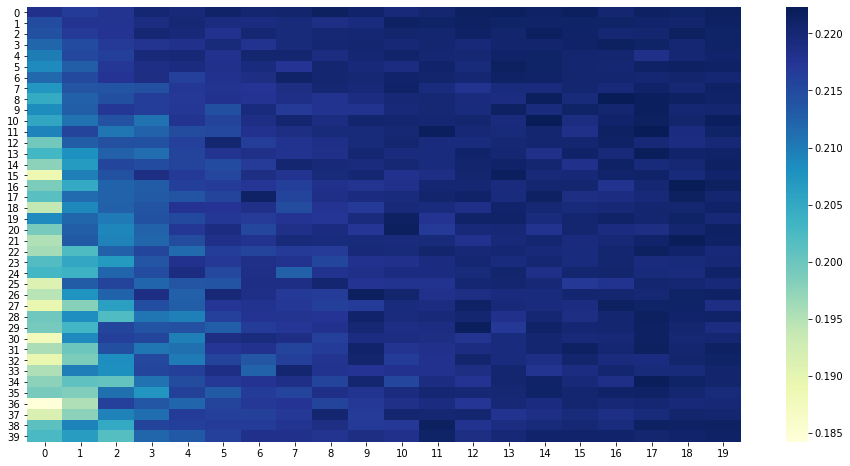

In [514]:
plt.figure(figsize=(16,8))
sns.heatmap(sr,cmap="YlGnBu")
plt.show()